# Seaborn

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline


In [8]:
auto=pd.read_csv("Automobile_data.csv")
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
brandVSfuel=auto.groupby(["make","fuel-type"]).size().unstack(fill_value=0)
brandVSfuel

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


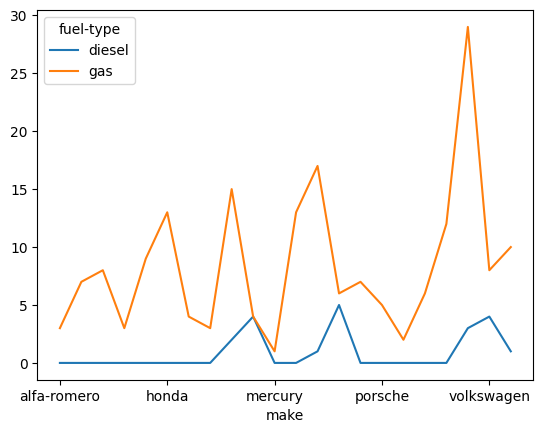

In [15]:
brandVSfuel.plot(kind='line',stacked=False)
plt.show()

In [16]:
brandVSdoor=auto.groupby(["make","num-of-doors"]).size().unstack(fill_value=0)
brandVSdoor

num-of-doors,?,four,two
make,,,
alfa-romero,0,0,3
audi,0,5,2
bmw,0,5,3
chevrolet,0,1,2
dodge,1,4,4
honda,0,5,8
isuzu,0,2,2
jaguar,0,2,1
mazda,1,7,9


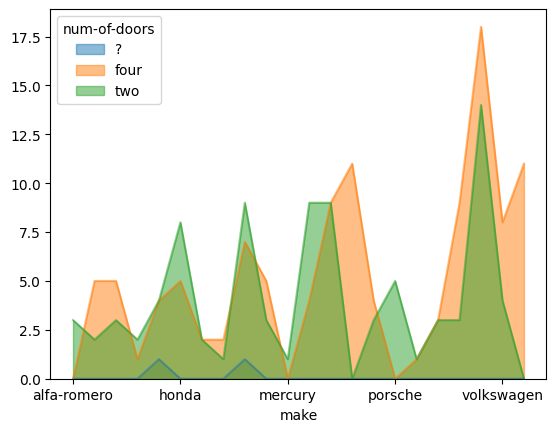

In [18]:
brandVSdoor.plot(kind='area',stacked=False)
plt.show()

In [3]:
# # brandVSprice=auto.groupby(["make","fuel-type","price"]).size().unstack(fill_value=0)
# # print(brandVSprice)
# # auto.head()
# # Budget=input("what is ur budget")
# # categories = {
# #     "average car": {"price_range": (10000, 15000)
# #     },
# #     "Above car": { "price_range": (15000, 30000)
# #     },
# #     "economy car": { "price_range": (30000, 35000)
# #     },
# #     "Luxury": {"price_range": (35000, 50000)
# #     }
# # }
# # for category, details in categories.items():
# #     price_range = details["price_range"]
# #     if p=='?'
# #     print("price is ivalid")
# #      price_range[0] <= Budget <= price_range[1]:
# #         print(f"The category for your budget ({Budget}) is: {category}")
# #         break
# # else:
# #     print("No category matches your budget.")
# import pandas as pd

# # Assuming 'auto' is a DataFrame that contains car data
# # Grouping by 'make', 'fuel-type', and 'price', then counting the occurrences
# brandVSprice = auto.groupby(["make", "fuel-type", "price"]).size().unstack(fill_value=0)
# print(brandVSprice)

# # Display the first few rows of the DataFrame
# print(auto.head())

# # Getting the user's budget
# try:
#     Budget = float(input("What is your budget? "))
# except ValueError:
#     print("Invalid input. Please enter a numeric value for the budget.")
#     Budget = None

# if Budget is not None:
#     # Defining categories based on price ranges
#     categories = {
#         "average car": {"price_range": (10000, 15000)},
#         "above average car": {"price_range": (15000, 30000)},
#         "economy car": {"price_range": (30000, 35000)},
#         "luxury": {"price_range": (35000, 50000)}
#     }

#     # Checking which category the budget fits into
#     for category, details in categories.items():
#         price_range = details["price_range"]
#         if price_range[0] <= Budget <= price_range[1]:
#             print(f"The category for your budget ({Budget}) is: {category}")
#             break
#     else:
#         print("No category matches your budget.")


In [8]:
import pandas as pd

# Reading the CSV file into a DataFrame
auto = pd.read_csv("Automobile_data.csv")

# Creating a new DataFrame with only 'price' and 'make' columns
autoData = auto[['price', 'make']]

# Defining categories for budget
categories = {
    'avg-car': (10000, 15000),
    'above_avg': (15000, 30000),
    'luxury': (30000, 50000)
}
autoData

,price,make
0,13495,alfa-romero
1,16500,alfa-romero
2,16500,alfa-romero
3,13950,audi
4,17450,audi
...,...,...
200,16845,volvo
201,19045,volvo
202,21485,volvo
203,22470,volvo


In [11]:
# Function to categorize each pbr
def fetch_budget(price):
    if price == '?':
        return 'undefined'
    else:
        price=int(price)
        for category, (low, high) in categories.items():
            if low <= price <= high:
                return category
        return 'undefined'  # Return 'undefined' if no category matches


autoData['budget'] = autoData['price'].apply(fetch_budget)
autoData

C:\Users\Saksh\AppData\Local\Temp\ipykernel_8072\925596035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autoData['budget'] = autoData['price'].apply(fetch_budget)


,price,make,budget
0,13495,alfa-romero,avg-car
1,16500,alfa-romero,above_avg
2,16500,alfa-romero,above_avg
3,13950,audi,avg-car
4,17450,audi,above_avg
...,...,...,...
200,16845,volvo,above_avg
201,19045,volvo,above_avg
202,21485,volvo,above_avg
203,22470,volvo,above_avg


In [13]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

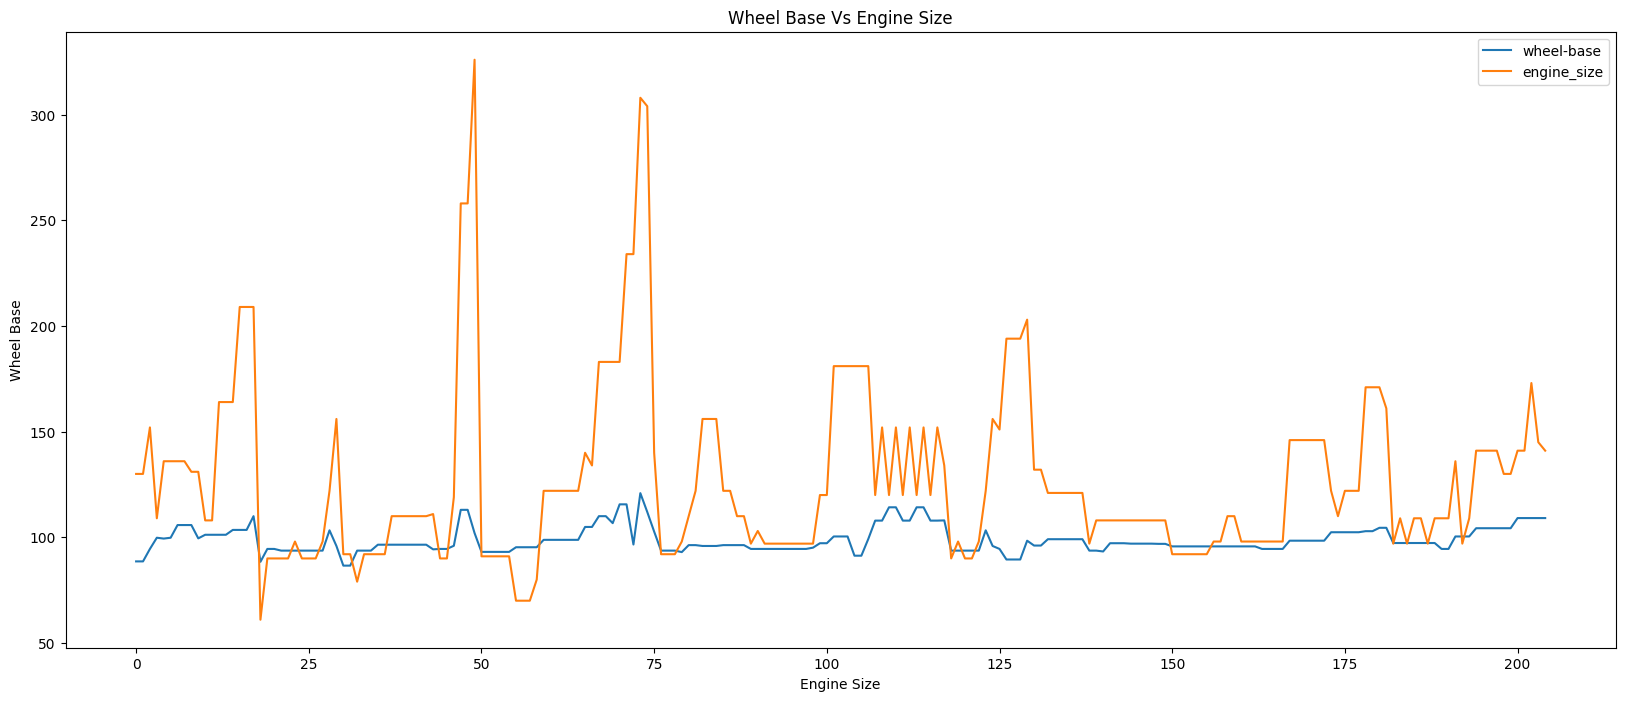

In [21]:
plt.figure(figsize=(20,8))

sns.lineplot(data=auto["wheel-base"],linewidth=1.5,label="wheel-base")
sns.lineplot(data=auto["engine-size"],linewidth=1.5,label="engine_size")

plt.title("Wheel Base Vs Engine Size")
plt.ylabel("Wheel Base")
plt.xlabel("Engine Size")

plt.show

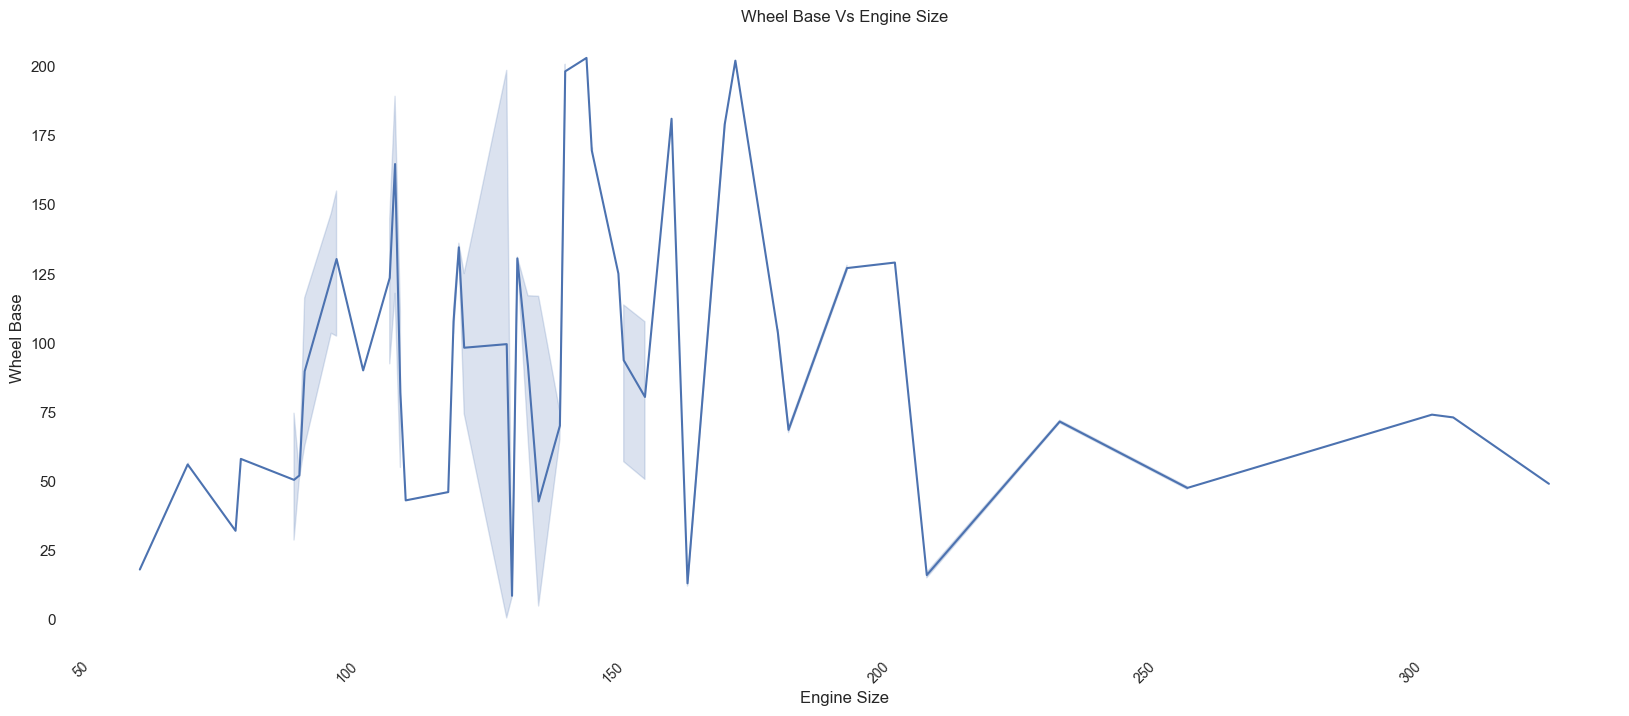

In [33]:
plt.figure(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#FFFFFF","axes.grid":True,"xtick.labelsize":10})

plt.title("Wheel Base Vs Engine Size")
plt.ylabel("Wheel Base")
plt.xlabel("Engine Size")
plt.xticks(rotation=45)
sns.lineplot(x=auto["engine-size"],y=auto["wheel-base"].index.values,color='b')
plt.show()

In [34]:
auto=pd.read_csv("Automobile_data.csv")
auto


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
